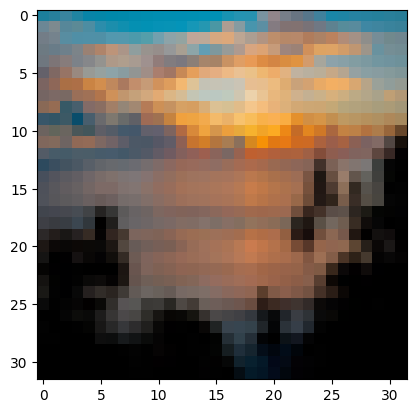

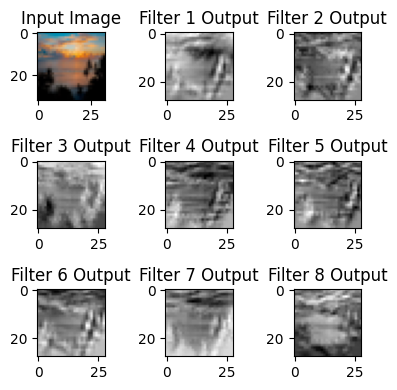

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
image = Image.open('sunset_400_dhHh1mi3o.webp')
image = image.resize((32,32))
img = np.array(image)
plt.imshow(img)

# Define a sample input tensor (32x32x3)
input_tensor = np.array(image)

# Define 8 sample filters (5x5x3)
num_filters = 8
filter_size = (5, 5, 3)
filter_tensors = [np.random.normal(loc=0, scale=1,size=filter_size) for _ in range(num_filters)]

# Initialize an array to store the output feature maps
output_feature_maps = []

# Define the stride
stride = 1

# Perform the convolution operation for each filter
for filter_tensor in filter_tensors:
    output_height = (input_tensor.shape[0] - filter_size[0]) // stride + 1
    output_width = (input_tensor.shape[1] - filter_size[1]) // stride + 1
    output_pixel = np.zeros((output_height, output_width))
    
    for i in range(0, input_tensor.shape[0] - filter_size[0] + 1, stride):
        for j in range(0, input_tensor.shape[1] - filter_size[1] + 1, stride):
            output_pixel[i // stride, j // stride] = np.sum(input_tensor[i:i + filter_size[0], j:j + filter_size[1], :] * filter_tensor)
    
    output_feature_maps.append(output_pixel)

# Plot the input image
plt.figure(figsize=(4, 4))
plt.subplot(3, 3, 1)
plt.imshow(input_tensor)
plt.title('Input Image')

# Plot the output feature maps for each filter
for i in range(num_filters):
    plt.subplot(3, 3, i + 2)
    plt.imshow(output_feature_maps[i], cmap='gray')
    plt.title(f'Filter {i + 1} Output')

plt.tight_layout()
plt.show()
